
# (Case-Study)==>Clustering the Countries by using Unsupervised Learning for HELP International 

Objective:
To categorise the countries using socio-economic and health factors that determine
the overall development of the country.

About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with
basic amenities and relief during the time of disasters and natural calamities.

Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and 
effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to 
categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to 
suggest the countries which the CEO needs to focus on the most.

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
#read data
df=pd.read_csv("Country-data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [91]:
#to check the null values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [93]:
#to check duplicat values in the data
df.duplicated().sum()

0

In [94]:
#summary of the data
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


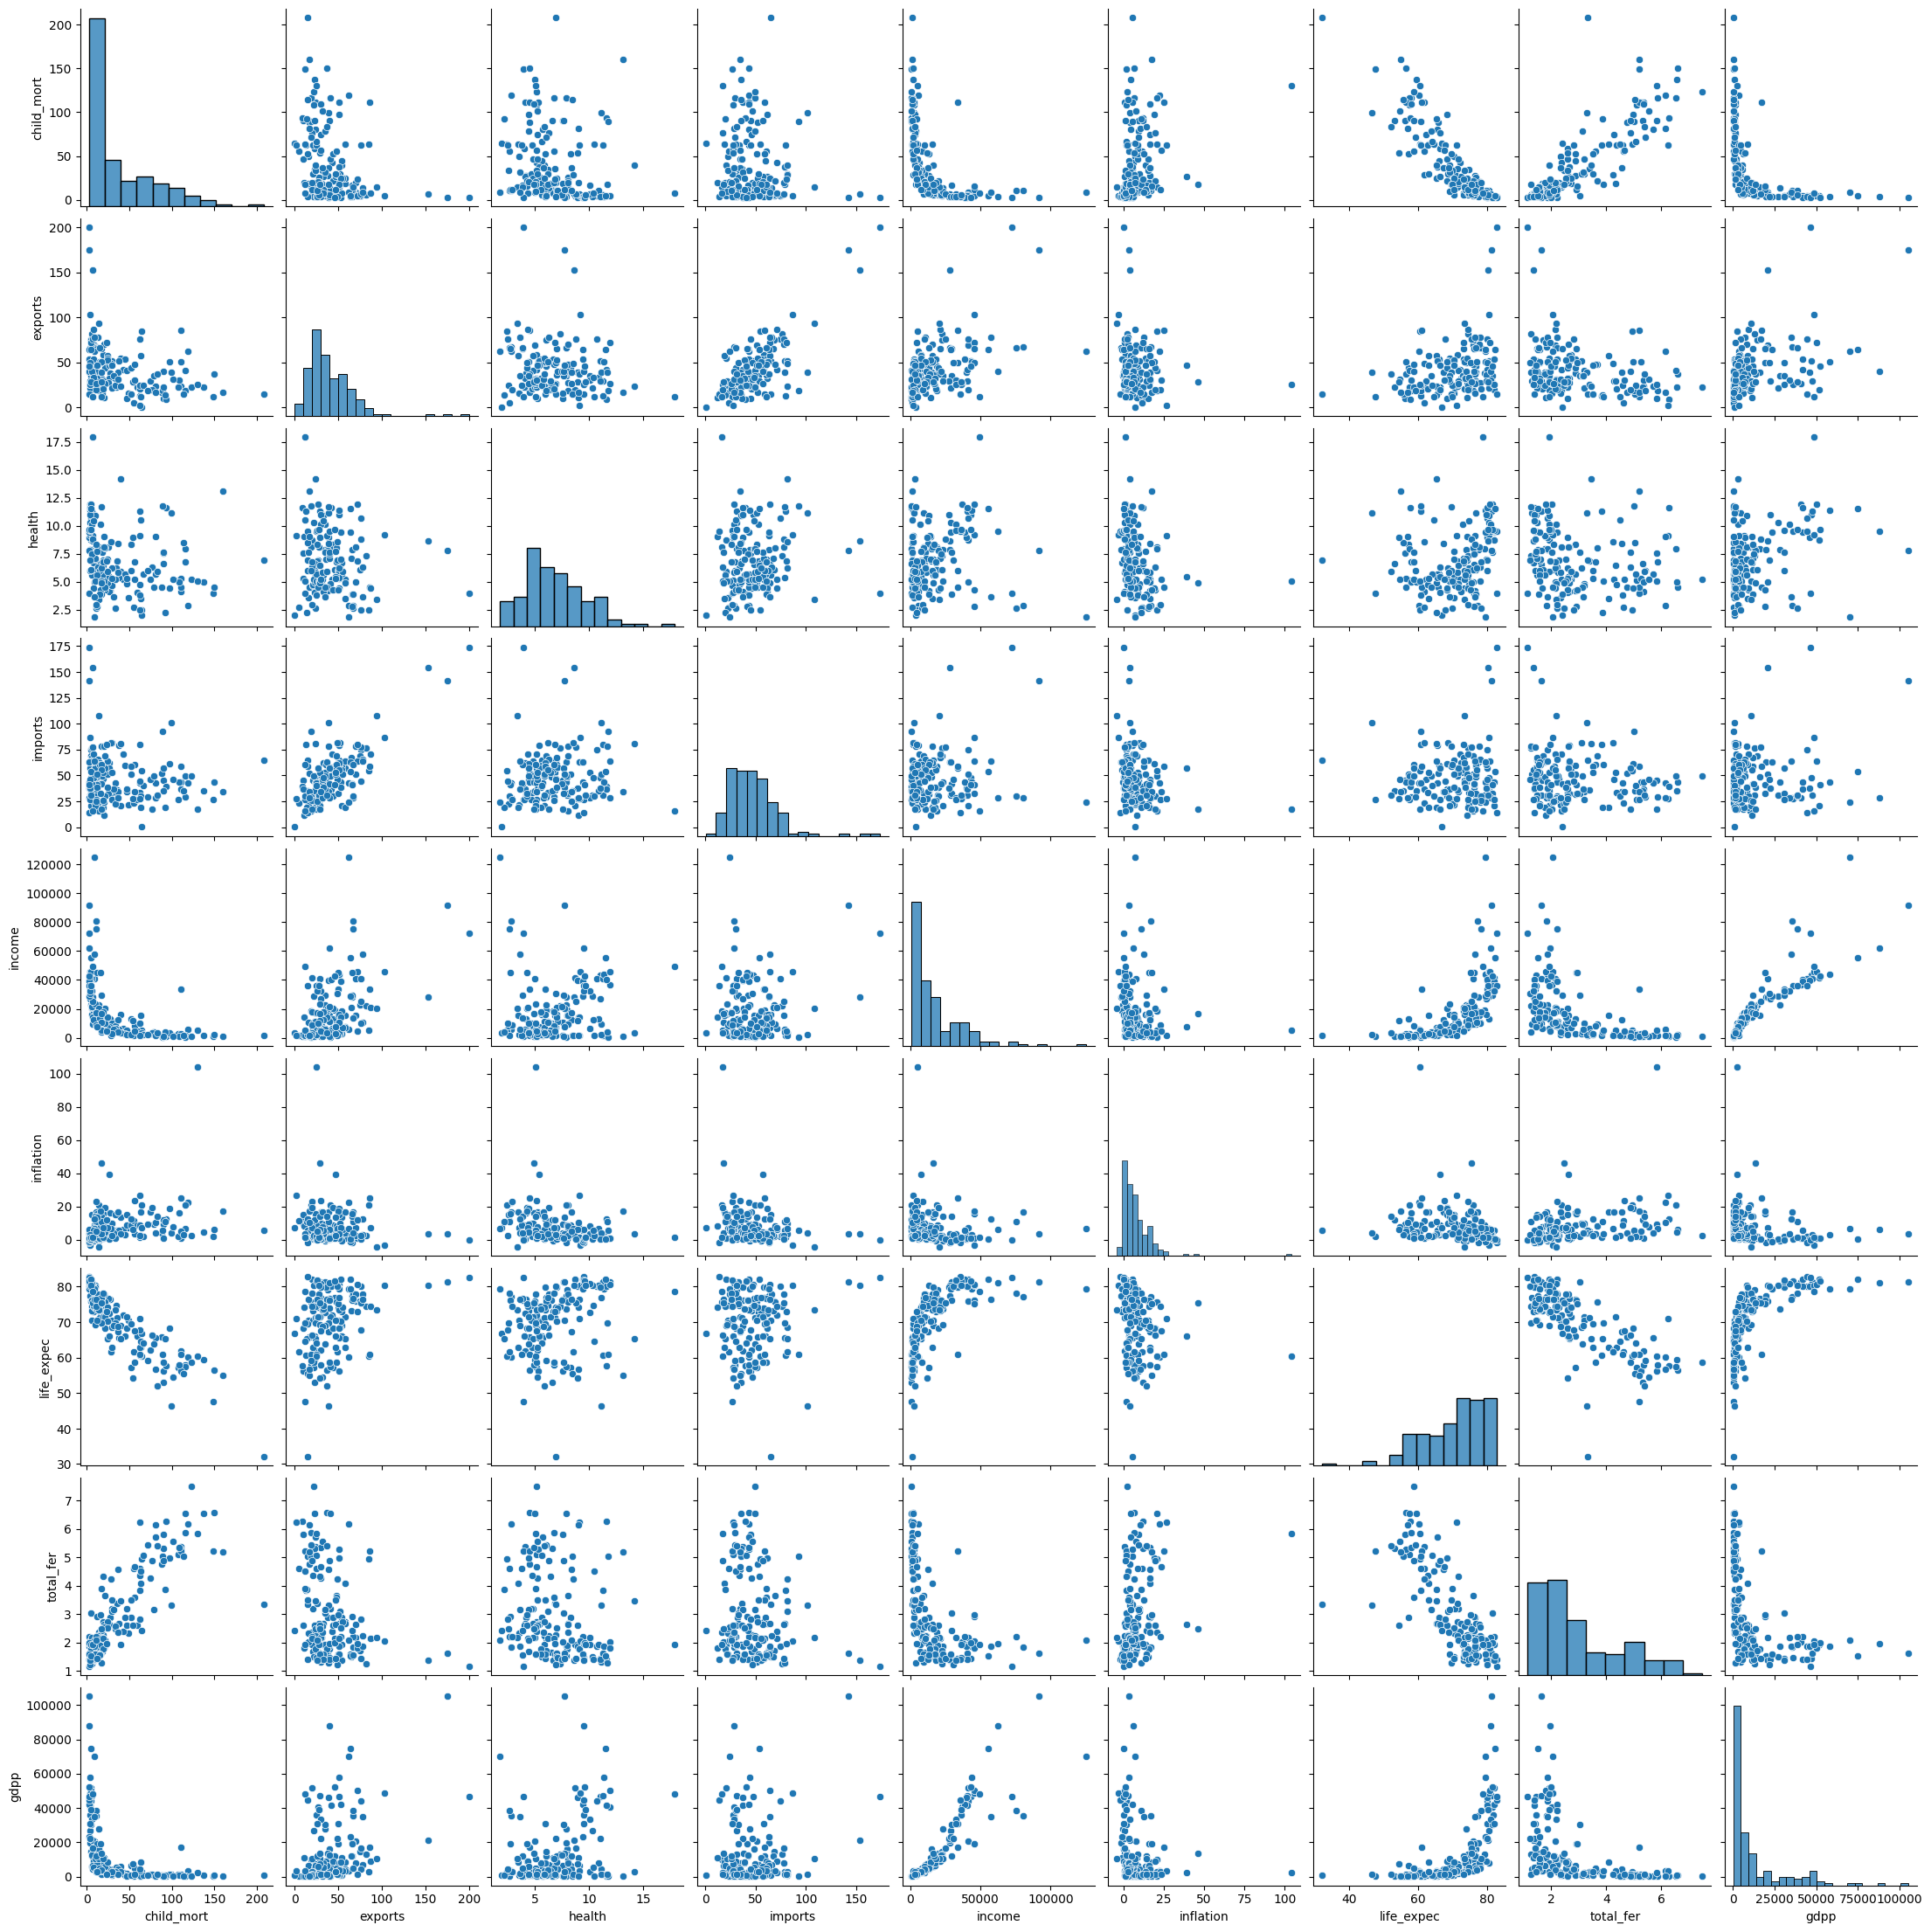

In [95]:
#check the pair pot
sns.pairplot(df)

<Axes: >

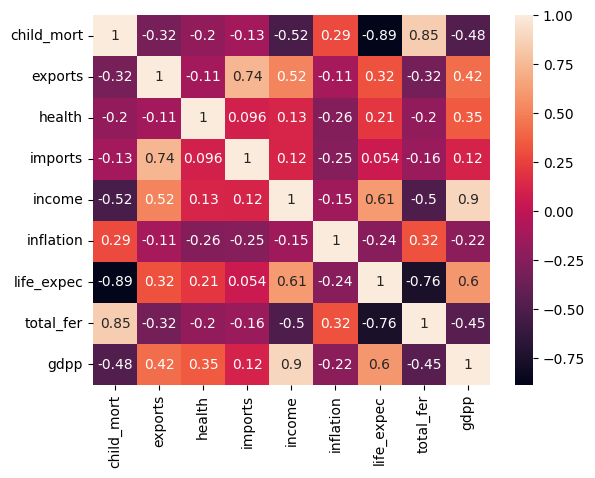

In [96]:
#check correleated colum via heatmap
sns.heatmap(x.corr(),annot=True)

In [97]:
#to extraxt the x data from the dataset
x=df.drop(columns=["country"])

In [98]:
#correleated colum we should keep the one colum from of pair.
#chid_mortality correleated with life exceptency = 0.89
#Child mortality strongly correlated with total_fertality = 0.85
#gdp and income are correleated with 0.9 
#export and import are correlated with 0.74.
#now i will keep one of the colum from each from them.

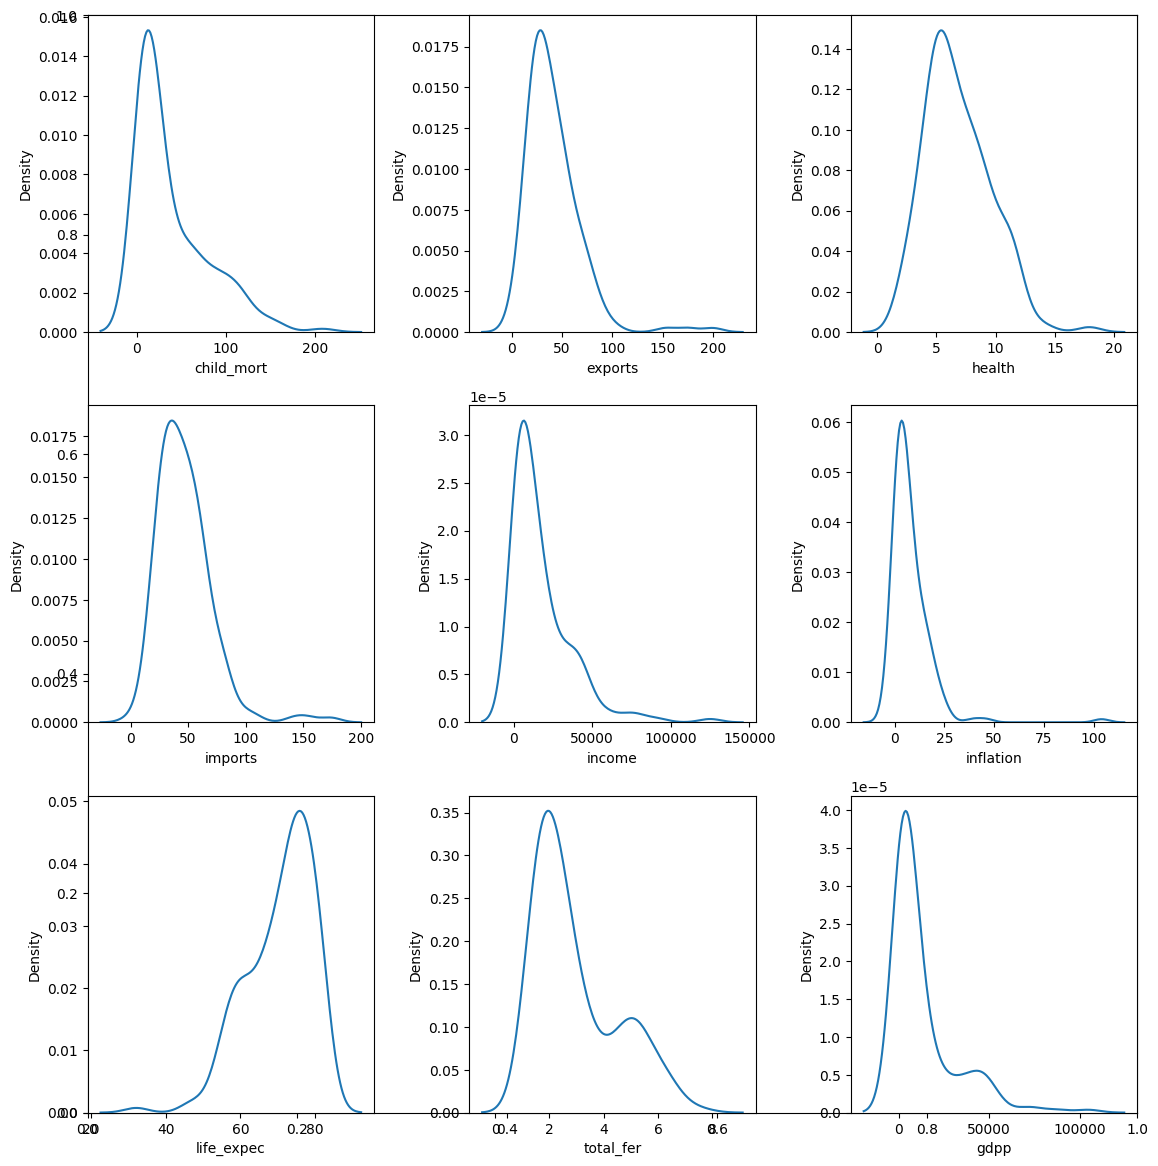

In [99]:
#to check the distribution of the data.
plt.subplots(figsize=(12,12))
for i,col in enumerate(x.columns):
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.kdeplot(x[col])
    plt.tight_layout()

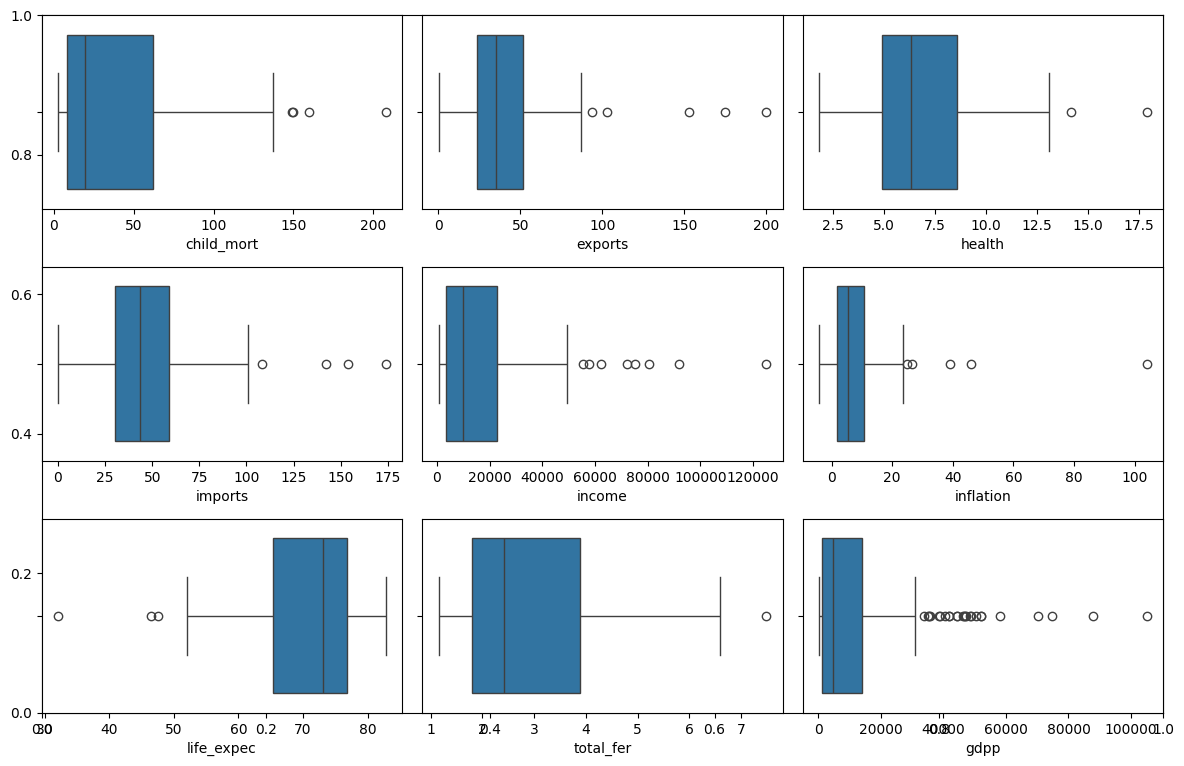

In [53]:
#to detect the outliers
plt.subplots(figsize=(12,8))
for i,feature in enumerate(x.columns):
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.boxplot(x[feature],orient="h")
    plt.tight_layout()

In [100]:
#Now removing outliers 
def handling_outliers(dataframe):
    new_df=dataframe.copy()
    for i in dataframe.columns:
        Q1=dataframe[i].quantile(0.25)
        Q3=dataframe[i].quantile(0.75)
            
        iqr=Q3-Q1
            
        upper_limit = Q3 + 1.5*(iqr)
        lower_limit = Q1 - 1.5*(iqr)

        new_df=new_df[(new_df[i] >= lower_limit) & (new_df[i] <= upper_limit)]
    
    return new_df

In [101]:
df_filtered=handling_outliers(x)

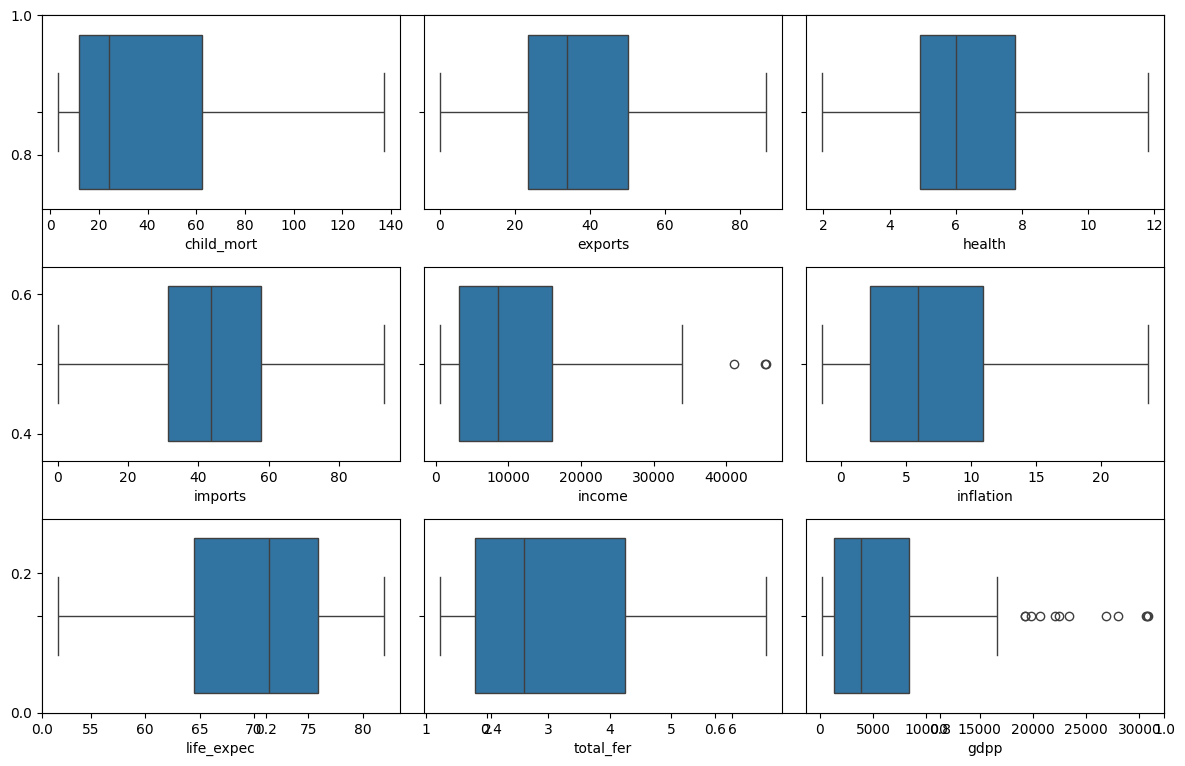

In [102]:
#after removing outliers
plt.subplots(figsize=(12,8))
for i,feature in enumerate(df_filtered.columns):
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.boxplot(df_filtered[feature],orient="h")
    plt.tight_layout()

In [106]:
#Drop Correlated columns.
df_filtered=df_filtered[["life_expec","total_fer","gdpp","exports","inflation"]]
df_filtered.head(22)

,life_expec,total_fer,gdpp,exports,inflation
0,56.2,5.82,553,10.0,9.440
1,76.3,1.65,4090,28.0,4.490
2,76.5,2.89,4460,38.4,16.100
3,60.1,6.16,3530,62.3,22.400
4,76.8,2.13,12200,45.5,1.440
5,75.8,2.37,10300,18.9,20.900
6,73.3,1.69,3220,20.8,7.770
9,69.1,1.92,5840,54.3,13.800
10,73.8,1.86,28000,35.0,-0.393
11,76.0,2.16,20700,69.5,7.440


In [107]:
#updated summery of new df_filterd
df_filtered.describe()

,life_expec,total_fer,gdpp,exports,inflation
count,128.000000,128.000000,128.000000,128.000000,128.000000
mean,69.694531,3.020781,6426.187500,37.427336,7.339727
std,7.408596,1.465922,7142.127941,18.794958,6.145248
min,52.000000,1.230000,231.000000,0.109000,-1.430000
25%,64.450000,1.795000,1305.000000,23.550000,2.255000
50%,71.350000,2.600000,3885.000000,34.000000,5.935000
75%,75.850000,4.247500,8412.500000,50.275000,10.950000
max,81.900000,6.550000,30800.000000,86.900000,23.600000


In [108]:
#Now scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
filter_df=sc.fit_transform(df_filtered)
print(filter_df.shape)

(128, 5)


labels are: [0 3 3 0 1 1 0 3 2 2 0 1 3 3 0 0 0 3 3 1 3 0 0 0 0 0 1 3 3 0 0 0 3 0 1 2 2
 3 3 0 0 0 1 0 3 0 0 0 2 3 0 0 0 0 1 0 0 3 3 2 3 0 3 0 0 0 0 1 3 0 1 1 3 0
 0 3 3 0 0 3 0 3 0 0 0 3 0 2 0 3 0 3 0 1 2 3 1 0 0 2 0 3 1 2 0 3 2 2 0 3 0
 3 0 0 3 0 0 3 1 3 0 0 1 0 0 0 0 0]
lable shape: (128,)


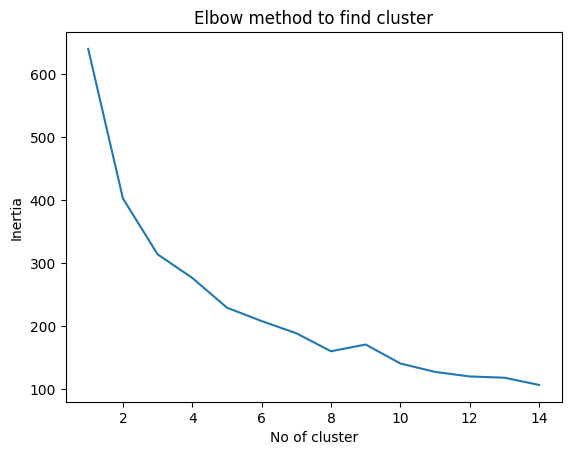

In [120]:
#Now import the algoritham and pass the data
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
#there should be how much cluster -----> CHECK VIA ELBOW METHOD

wcss=[]

for i in range(1,15):
    kmean=KMeans(n_clusters=i)
    kmean.fit_predict(filter_df)
    plt.xlabel("No of cluster")
    plt.ylabel("Inertia")
    plt.title("Elbow method to find cluster")
    wcss.append(kmean.inertia_)

#Now plot the elbow method.

plt.plot(range(1,15),wcss)

#Now fit teh data into the model
km.fit_predict(df_filtered)
print("labels are:",km.labels_)
print("lable shape:",km.labels_.shape)

In [124]:
#Hirarichal Clustering
from sklearn.cluster import AgglomerativeClustering

#Apply hirarichal clustering
agglo_cluster= AgglomerativeClustering(n_clusters=4,metric="euclidean",)
agglo_cluster.fit_predict(df_filtered)
agglo_cluster.labels_

array([2, 2, 2, 2, 1, 1, 2, 3, 0, 0, 2, 1, 3, 2, 2, 2, 2, 2, 3, 1, 3, 2,
       2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2,
       3, 2, 2, 2, 0, 3, 2, 2, 2, 2, 1, 2, 2, 3, 2, 0, 2, 2, 3, 2, 2, 2,
       2, 1, 3, 2, 1, 1, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 0,
       2, 3, 2, 2, 2, 1, 0, 3, 1, 2, 2, 0, 2, 2, 1, 0, 2, 3, 0, 0, 2, 3,
       2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2], dtype=int64)

In [125]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [156]:
#Concate the algoritham.
country_df_clustered = df.iloc[:,:]
country_df_clustered=pd.concat([country_df_clustered,pd.DataFrame(agglo_cluster.labels_,columns=["Hrarichal_val_cluster"])],axis=1)
country_df_clustered=pd.concat([country_df_clustered,pd.DataFrame(km.labels_,columns=["km_cluster_val"])],axis=1)
country_df_clustered.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hrarichal_val_cluster,km_cluster_val
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,2.0,0.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2.0,3.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2.0,3.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2.0,0.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1.0,1.0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1.0,1.0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2.0,0.0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3.0,3.0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0.0,2.0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0.0,2.0


In [160]:
print("Hirarichal clustering labels:",country_df_clustered["Hrarichal_val_cluster"].value_counts())
print("Kmean cluster labels:",country_df_clustered["km_cluster_val"].value_counts())

Hirarichal clustering labels: Hrarichal_val_cluster
2.0    80
3.0    20
1.0    16
0.0    12
Name: count, dtype: int64
Kmean cluster labels: km_cluster_val
0.0    64
3.0    36
1.0    16
2.0    12
Name: count, dtype: int64


In [201]:
print("Cluster 0 of hirarichary:Agglomarative clustering")
print(country_df_clustered[country_df_clustered["Hrarichal_val_cluster"]==0].country.unique())
print()
print("Cluster 1 of hirarichary:Agglomarative clustering")
print(country_df_clustered[country_df_clustered["Hrarichal_val_cluster"]==1].country.unique())
print()
print("Cluster 2 of hirarichary:Agglomarative clustering")
print(country_df_clustered[country_df_clustered["Hrarichal_val_cluster"]==2].country.unique())
print()
print("Cluster 3 of hirarichary:Agglomarative clustering")
print(country_df_clustered[country_df_clustered["Hrarichal_val_cluster"]==3].country.unique())

Cluster 0 of hirarichary:Agglomarative clustering
['Austria' 'Azerbaijan' 'Colombia' 'Comoros' 'El Salvador' 'Ghana'
 'Lesotho' 'Malawi' 'Mauritania' 'Mongolia' 'Mozambique' 'Myanmar']

Cluster 1 of hirarichary:Agglomarative clustering
['Antigua and Barbuda' 'Argentina' 'Bahrain' 'Bolivia' 'Burundi' 'China'
 'Cyprus' 'France' 'Hungary' 'Indonesia' 'Iran' 'Madagascar' 'Maldives'
 'Moldova' 'Paraguay' 'Portugal']

Cluster 2 of hirarichary:Agglomarative clustering
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Armenia' 'Bahamas' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Cambodia' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chile' 'Congo, Dem. Rep.' 'Congo, Rep.'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Czech Republic'
 'Dominican Republic' 'Ecuador' 'Egypt' 'Eritrea' 'Estonia' 'Fiji'
 'Finland' 'Gabon' 'Gambia' 'Germany' 'Greece' 'Grenada' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'India' 'Iraq' 'Ireland' 'Israel'
 'Jap

In [170]:
print("Cluster 0 of KMeans clustering:")
print(country_df_clustered[country_df_clustered["km_cluster_val"]==0].country.unique())
print()
print("Cluster 1 of KMeans clustering:")
print(country_df_clustered[country_df_clustered["km_cluster_val"]==1].country.unique())
print()
print("Cluster 2 for KMeans clustering:")
print(country_df_clustered[country_df_clustered["km_cluster_val"]==2].country.unique())
print()
print("Cluster 3 for KMeans clustering:")
country_df_clustered[country_df_clustered["km_cluster_val"]==3].country.unique()

Cluster 0 of KMeans clustering:
['Afghanistan' 'Angola' 'Armenia' 'Bahamas' 'Belarus' 'Belgium' 'Belize'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chile' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Czech Republic' 'Dominican Republic' 'Ecuador'
 'Egypt' 'Eritrea' 'Estonia' 'Fiji' 'Finland' 'Gabon' 'Gambia' 'Grenada'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'India' 'Ireland' 'Israel'
 'Japan' 'Jordan' 'Kenya' 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Lebanon'
 'Liberia' 'Lithuania' 'Macedonia, FYR' 'Mali' 'Malta' 'Mauritius'
 'Montenegro' 'Namibia' 'Netherlands' 'Niger' 'Nigeria' 'Oman' 'Pakistan'
 'Philippines' 'Poland' 'Qatar' 'Romania' 'Russia' 'Rwanda' 'Samoa']

Cluster 1 of KMeans clustering:
['Antigua and Barbuda' 'Argentina' 'Bahrain' 'Bolivia' 'Burundi' 'China'
 'Cyprus' 'France' 'Hungary' 'Indonesia' 'Iran' 'Madagascar' 'Maldives'
 'Moldova' 'Paraguay' 'Portugal']

Cluster 2 for KMeans clustering:
['Austria' 'Azerbaijan' '

array(['Albania', 'Algeria', 'Australia', 'Bangladesh', 'Barbados',
       'Benin', 'Bhutan', 'Bosnia and Herzegovina', 'Cambodia',
       'Cameroon', 'Chad', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Denmark',
       'Equatorial Guinea', 'Georgia', 'Germany', 'Greece', 'Guatemala',
       'Iceland', 'Iraq', 'Italy', 'Jamaica', 'Kazakhstan', 'Kiribati',
       'Latvia', 'Libya', 'Luxembourg', 'Malaysia',
       'Micronesia, Fed. Sts.', 'Morocco', 'Nepal', 'New Zealand',
       'Norway', 'Panama', 'Peru'], dtype=object)

In [182]:
#Now under developed countries for both of the model.
countries=country_df_clustered[(country_df_clustered["km_cluster_val"]==0) | (country_df_clustered["Hrarichal_val_cluster"]==2)].sort_values(by=["gdpp","life_expec","inflation"],ascending=[True,False,True])[["country","Hrarichal_val_cluster","km_cluster_val"]]
countries.reset_index(inplace=True)

In [196]:
#These companies need help.
countries.head(30)

,country,Hrarichal_val_cluster,km_cluster_val
0,Liberia,2.0,0.0
1,"Congo, Dem. Rep.",2.0,3.0
2,Niger,2.0,0.0
3,Central African Republic,2.0,0.0
4,Eritrea,2.0,0.0
5,Guinea-Bissau,2.0,0.0
6,Afghanistan,2.0,0.0
7,Gambia,2.0,0.0
8,Rwanda,2.0,0.0
9,Burkina Faso,2.0,0.0
